# **[Project] Cancer Subtype Classification**

# Introduction

The [TCGA Kidney Cancers Dataset](https://archive.ics.uci.edu/dataset/892/tcga+kidney+cancers) is a bulk RNA-seq dataset that contains transcriptome profiles (i.e., gene expression quantification data) of patients diagnosed with three different subtypes of kidney cancers.
This dataset can be used to make predictions about the specific subtype of kidney cancers given the normalized transcriptome profile data.

The normalized transcriptome profile data is given as **TPM** and **FPKM** for each gene.

> TPM (Transcripts Per Million) and FPKM (Fragments Per Kilobase Million) are two common methods for quantifying gene expression in RNA sequencing data.
> They both aim to account for the differences in sequencing depth and transcript length when estimating gene expression levels.
>
> **TPM** (Transcripts Per Million):
> - TPM is a measure of gene expression that normalizes for both library size (sequencing depth) and transcript length.
> - The main idea behind TPM is to express the abundance of a transcript relative to the total number of transcripts in a sample, scaled to one million.
>
> **FPKM** (Fragments Per Kilobase Million):
> - FPKM is another method for quantifying gene expression, which is commonly used in older RNA-seq analysis pipelines. It's similar in concept to TPM but differs in the way it's calculated.
> - FPKM also normalizes for library size and transcript length, but it measures gene expression as the number of fragments (i.e., reads) per kilobase of exon model per million reads.
>
> TPM is generally considered more robust to variations in library size, making it a preferred choice in many modern RNA-seq analysis workflows.

We provide one dataset for each kidney cancer subtype:

- [TCGA-KICH](https://portal.gdc.cancer.gov/projects/TCGA-KICH): kidney chromophobe (renal clear cell carcinoma)
- [TCGA-KIRC](https://portal.gdc.cancer.gov/projects/TCGA-KIRC): kidney renal clear cell carcinoma
- [TCGA-KIRP](https://portal.gdc.cancer.gov/projects/TCGA-KIRP): kidney renal papillary cell carcinoma

> This and _much_ more data is openly available on the [NCI Genomic Data Commons (GDC) Data Portal](https://portal.gdc.cancer.gov/).

# Data access

There are two ways to access the data: via the TNT homepage or the GDC Data Portal.

## Download from the TNT homepage (_recommended_)

The download from the TNT homepage is straightforward:

In [2]:
#! wget http://www.tnt.uni-hannover.de/edu/vorlesungen/AMLG/data/project-cancer-classification.tar.gz
#! tar -xzvf project-cancer-classification.tar.gz
#! mv -v project-cancer-classification/ data/
#! rm -v project-cancer-classification.tar.gz

In the `data/` folder you will now find many files in the [TSV format](https://en.wikipedia.org/wiki/Tab-separated_values) ([CSV](https://en.wikipedia.org/wiki/Comma-separated_values)-like with tabs as delimiter) containing the normalized transcriptome profile data.

To start, you can read a TSV file into a [pandas](https://pandas.pydata.org) [`DataFrame`](pandas dataframe to dict) using the [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) function with the `sep` parameter set to `\t`:

In [3]:
tsv_file_path = "data/tcga-kich-geq/00ddf8c2-039f-409f-a2ed-b29e18395dd4/f07b7c4c-5f30-4c51-9eb1-4f873ad49c56.rna_seq.augmented_star_gene_counts.tsv"

# Read the TSV file into a DataFrame
df = pd.read_csv(tsv_file_path, sep='\t', header=1)
second_column_values = df.iloc[:, 1].tolist()
df_columns = pd.DataFrame(columns=second_column_values)
df_empty = df_columns.drop(columns=df_columns.columns[:4])
print(df)

                  gene_id   gene_name       gene_type  unstranded   
0              N_unmapped         NaN             NaN     1794518  \
1          N_multimapping         NaN             NaN    10966625   
2             N_noFeature         NaN             NaN     1699245   
3             N_ambiguous         NaN             NaN     6106477   
4      ENSG00000000003.15      TSPAN6  protein_coding        1107   
...                   ...         ...             ...         ...   
60659   ENSG00000288669.1  AC008763.4  protein_coding           0   
60660   ENSG00000288670.1  AL592295.6          lncRNA         195   
60661   ENSG00000288671.1  AC006486.3  protein_coding           0   
60662   ENSG00000288674.1  AL391628.1  protein_coding           1   
60663   ENSG00000288675.1  AP006621.6  protein_coding          39   

       stranded_first  stranded_second  tpm_unstranded  fpkm_unstranded   
0             1794518          1794518             NaN              NaN  \
1            10966625

In [2]:
import pandas as pd
import os
tsv_file_path = "data/tcga-kich-geq/00ddf8c2-039f-409f-a2ed-b29e18395dd4/f07b7c4c-5f30-4c51-9eb1-4f873ad49c56.rna_seq.augmented_star_gene_counts.tsv"
main_folder_path_kich = "data/tcga-kich-geq"
dfs = pd.DataFrame({'Column1': [1, 2, 3, 4, 5]})
# Read the TSV file into a DataFrame
df = pd.read_csv(tsv_file_path, sep='\t', header=1)

##df = df[['tpm_unstranded']]
#transposed_df = df.transpose().reset_index(drop=True)

#print(transposed_df)
#second_column_values = df.iloc[:, 1].tolist()
#df_columns = pd.DataFrame(columns=second_column_values)
#df_empty = df_columns.drop(columns=df_columns.columns[:4])

for subfolder in os.listdir(main_folder_path_kich):
    subfolder_path = os.path.join(main_folder_path_kich, subfolder)
    if os.path.isdir(subfolder_path):
        # Iterate through all the files in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".tsv"):  # Consider only CSV files, modify the condition as per your file type
                file_path = os.path.join(subfolder_path, filename)
                df1 = pd.read_csv(file_path, sep='\t', header=1)
                #df = df.drop([1, 2, 3, 4])
                df1 = df1['tpm_unstranded']

                dfs = pd.concat([dfs, df1], axis=1)
               
print(dfs)



       Column1  tpm_unstranded  tpm_unstranded  tpm_unstranded   
0          1.0             NaN             NaN             NaN  \
1          2.0             NaN             NaN             NaN   
2          3.0             NaN             NaN             NaN   
3          4.0             NaN             NaN             NaN   
4          5.0         19.7011         31.6275         35.9928   
...        ...             ...             ...             ...   
60659      NaN          0.0000          0.0000          0.0000   
60660      NaN          3.1977         15.4262         13.2312   
60661      NaN          0.0000          0.0000          0.0000   
60662      NaN          0.0104          0.0042          0.1154   
60663      NaN          0.3953          0.4094          0.3050   

       tpm_unstranded  tpm_unstranded  tpm_unstranded  tpm_unstranded   
0                 NaN             NaN             NaN             NaN  \
1                 NaN             NaN             NaN        

In [71]:
transposed= dfs.transpose()
transposed.columns = second_column_values
transposed = transposed.drop(columns=transposed.columns[:4])
transposed['cancer_type'] = 'kidney chromophobe'
transposed = transposed.drop(transposed.index[0])

# Reset the index if needed
transposed = transposed.reset_index(drop=True)
print(transposed)

      TSPAN6    TNMD      DPM1    SCYL3  C1orf112      FGR      CFH    FUCA2   
0    19.7011  0.1125   46.1397   1.8913    0.2670  18.6466   4.3945  24.1591  \
1    31.6275  0.0000   45.5189   2.8743    0.4744   4.2348   1.4145  60.8153   
2    35.9928  0.5207  108.0270   4.8134    0.8010   4.5446   3.2850  33.1630   
3    18.2605  0.0921   27.5398   2.3258    0.3473   4.5023   1.5078  47.2006   
4    68.8052  3.4134   88.0619   6.2415    1.2251   9.5310  30.6990  66.3841   
..       ...     ...       ...      ...       ...      ...      ...      ...   
86  121.4110  2.4786  110.3971  10.1461    1.7295   7.7405  20.9259  63.2070   
87   35.5623  0.0215   48.3619   3.7861    0.7816   3.1254   3.0986  56.5320   
88   13.2803  1.9366   94.4090   3.2603    0.9076  13.1822  25.2874  41.7101   
89   12.6005  0.3796   69.6067   1.0475    0.3191   0.6075   0.0983  20.0948   
90   35.6438  2.0935   87.0411   2.1779    0.6785   1.9878  20.2293  49.0954   

       GCLC     NFYA  ...  AC092910.4  

In [72]:
main_folder_path_kirc = "data/tcga-kirc-geq"
dfs = pd.DataFrame({'Column1': [1, 2, 3, 4, 5]})
# Read the TSV file into a DataFrame
df = pd.read_csv(tsv_file_path, sep='\t', header=1)

##df = df[['tpm_unstranded']]
#transposed_df = df.transpose().reset_index(drop=True)

#print(transposed_df)
#second_column_values = df.iloc[:, 1].tolist()
#df_columns = pd.DataFrame(columns=second_column_values)
#df_empty = df_columns.drop(columns=df_columns.columns[:4])

for subfolder in os.listdir(main_folder_path_kirc):
    subfolder_path = os.path.join(main_folder_path_kirc, subfolder)
    if os.path.isdir(subfolder_path):
        # Iterate through all the files in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".tsv"):  # Consider only CSV files, modify the condition as per your file type
                file_path = os.path.join(subfolder_path, filename)
                df1 = pd.read_csv(file_path, sep='\t', header=1)
                #df = df.drop([1, 2, 3, 4])
                df1 = df1['tpm_unstranded']

                dfs = pd.concat([dfs, df1], axis=1)
               
print(dfs)


       Column1  tpm_unstranded  tpm_unstranded  tpm_unstranded   
0          1.0             NaN             NaN             NaN  \
1          2.0             NaN             NaN             NaN   
2          3.0             NaN             NaN             NaN   
3          4.0             NaN             NaN             NaN   
4          5.0         20.4989         16.7564         47.7227   
...        ...             ...             ...             ...   
60659      NaN          0.0000          0.0000          0.0114   
60660      NaN          6.2389          7.9382         19.6258   
60661      NaN          0.0000          0.0000          0.0000   
60662      NaN          0.0968          0.0091          0.0426   
60663      NaN          1.5391          0.2430          0.3252   

       tpm_unstranded  tpm_unstranded  tpm_unstranded  tpm_unstranded   
0                 NaN             NaN             NaN             NaN  \
1                 NaN             NaN             NaN        

In [73]:
transposed2= dfs.transpose()
transposed2.columns = second_column_values
transposed2 = transposed2.drop(columns=transposed2.columns[:4])
transposed2['cancer_type'] = 'kidney renal clear cell carcinoma'
transposed2 = transposed2.drop(transposed2.index[0])

# Reset the index if needed
transposed2 = transposed2.reset_index(drop=True)
print(transposed2)

      TSPAN6     TNMD      DPM1   SCYL3  C1orf112      FGR      CFH     FUCA2   
0    20.4989   0.6307   34.2764  3.8018    1.2301  12.0800  20.5303   29.5774  \
1    16.7564   0.6123   28.1889  2.4017    0.8546  15.4396   6.5434   43.7739   
2    47.7227   3.3928   54.7654  5.8336    1.0295   5.7613  25.5863   58.6724   
3    41.0894   0.2542   92.8086  5.7735    1.8798  32.5072   4.1891   71.1348   
4    38.5956   0.2024  113.8671  3.3774    1.4508  25.2718  96.5372   94.8819   
..       ...      ...       ...     ...       ...      ...      ...       ...   
609  49.2877   0.6744   93.3007  6.7392    3.2013  27.1368  29.4215   81.3635   
610  43.5086   3.9964   56.7599  5.2039    1.6904  22.9888   8.3001   87.7643   
611  74.6347  73.6043   62.2771  4.2713    2.1008  16.7598  73.8668  100.1974   
612  27.9815   0.5903   53.4206  3.6430    1.5163  20.3391  70.9611   83.0577   
613  24.0375   0.1809   39.6818  2.9324    1.1985  10.5150   7.1663   71.0682   

        GCLC     NFYA  ... 

In [74]:
main_folder_path_kirp = "data/tcga-kirp-geq"

dfs = pd.DataFrame({'Column1': [1, 2, 3, 4, 5]})
# Read the TSV file into a DataFrame
df = pd.read_csv(tsv_file_path, sep='\t', header=1)

##df = df[['tpm_unstranded']]
#transposed_df = df.transpose().reset_index(drop=True)

#print(transposed_df)
#second_column_values = df.iloc[:, 1].tolist()
#df_columns = pd.DataFrame(columns=second_column_values)
#df_empty = df_columns.drop(columns=df_columns.columns[:4])

for subfolder in os.listdir(main_folder_path_kirp):
    subfolder_path = os.path.join(main_folder_path_kirp, subfolder)
    if os.path.isdir(subfolder_path):
        # Iterate through all the files in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".tsv"):  # Consider only CSV files, modify the condition as per your file type
                file_path = os.path.join(subfolder_path, filename)
                df1 = pd.read_csv(file_path, sep='\t', header=1)
                #df = df.drop([1, 2, 3, 4])
                df1 = df1['tpm_unstranded']

                dfs = pd.concat([dfs, df1], axis=1)
               
print(dfs)


       Column1  tpm_unstranded  tpm_unstranded  tpm_unstranded   
0          1.0             NaN             NaN             NaN  \
1          2.0             NaN             NaN             NaN   
2          3.0             NaN             NaN             NaN   
3          4.0             NaN             NaN             NaN   
4          5.0         20.3310         37.0405         45.4456   
...        ...             ...             ...             ...   
60659      NaN          0.0000          0.0000          0.0000   
60660      NaN          7.5444         13.7207         22.9856   
60661      NaN          0.0000          0.0000          0.0000   
60662      NaN          0.0000          0.0192          0.0485   
60663      NaN          0.1432          0.9155          0.7540   

       tpm_unstranded  tpm_unstranded  tpm_unstranded  tpm_unstranded   
0                 NaN             NaN             NaN             NaN  \
1                 NaN             NaN             NaN        

In [75]:
transposed3= dfs.transpose()
transposed3.columns = second_column_values
transposed3 = transposed3.drop(columns=transposed3.columns[:4])
transposed3['cancer_type'] = 'kidney renal papillary cell carcinoma'
transposed3 = transposed3.drop(transposed3.index[0])

# Reset the index if needed
transposed3 = transposed3.reset_index(drop=True)
print(transposed3)

      TSPAN6    TNMD     DPM1   SCYL3  C1orf112      FGR       CFH     FUCA2   
0    20.3310  0.0000  25.1806  1.1301    0.4836   7.3269    3.9694   59.2777  \
1    37.0405  0.5002  77.4246  4.2188    1.0408  29.9423   24.2155  111.1185   
2    45.4456  0.0903  74.9545  4.8430    1.5188  11.8081   30.6027   76.7098   
3    15.2345  0.3393  62.0003  2.4412    0.9320   2.6651    0.7739   46.1160   
4    35.0709  0.2333  62.8022  2.8872    1.0547  18.8354    2.7739   78.3001   
..       ...     ...      ...     ...       ...      ...       ...       ...   
318  28.7166  0.0894  92.6662  5.2057    1.5806  17.5211  117.3793   66.3612   
319  23.5528  0.0000  34.0170  1.3381    0.5176  46.6287    4.8548  123.5756   
320  40.0416  0.4676  52.7965  3.9273    1.5992   4.0474    5.9676   45.2855   
321  37.8835  1.4256  60.0608  4.3963    1.4853  28.8121   19.1984   80.6165   
322  40.8749  0.0000  61.7930  3.5298    0.6139   6.0802   24.6884  106.4637   

        GCLC     NFYA  ...  AC092910.4 

In [76]:
final_df = pd.concat([transposed, transposed2, transposed3], ignore_index=True)
print(final_df)
final_df.to_csv("final_data_only_tpm.csv", index=False)

       TSPAN6    TNMD      DPM1   SCYL3  C1orf112      FGR       CFH   
0     19.7011  0.1125   46.1397  1.8913    0.2670  18.6466    4.3945  \
1     31.6275  0.0000   45.5189  2.8743    0.4744   4.2348    1.4145   
2     35.9928  0.5207  108.0270  4.8134    0.8010   4.5446    3.2850   
3     18.2605  0.0921   27.5398  2.3258    0.3473   4.5023    1.5078   
4     68.8052  3.4134   88.0619  6.2415    1.2251   9.5310   30.6990   
...       ...     ...       ...     ...       ...      ...       ...   
1023  28.7166  0.0894   92.6662  5.2057    1.5806  17.5211  117.3793   
1024  23.5528  0.0000   34.0170  1.3381    0.5176  46.6287    4.8548   
1025  40.0416  0.4676   52.7965  3.9273    1.5992   4.0474    5.9676   
1026  37.8835  1.4256   60.0608  4.3963    1.4853  28.8121   19.1984   
1027  40.8749  0.0000   61.7930  3.5298    0.6139   6.0802   24.6884   

         FUCA2     GCLC     NFYA  ...  AC092910.4  AC073611.1  AC136977.1   
0      24.1591   6.7242   9.4371  ...       0.000      0.0

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
# Load the data into a DataFrame
data = pd.read_csv('/home/jovyan/amlg-release/notebooks/projects/project-cancer-classification/final_data_only_tpm.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('cancer_type', axis=1)
y = data['cancer_type']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict the target variable for the validation data
y_pred = classifier.predict(X_val)

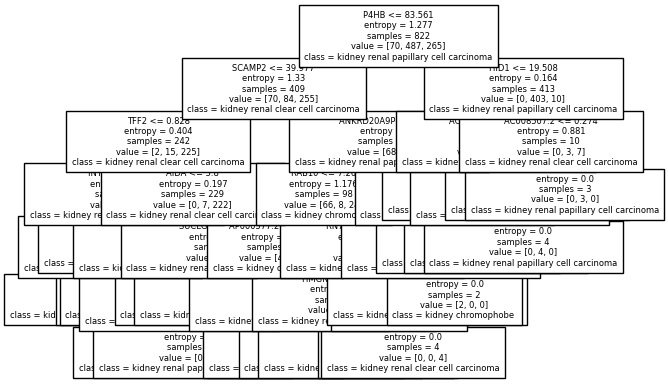

<Figure size 1200x1200 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import sklearn.tree
sklearn.tree.plot_tree(decision_tree=classifier, class_names = ["kidney chromophobe ", "kidney renal papillary cell carcinoma", "kidney renal clear cell carcinoma"], feature_names=second_column_values, fontsize= 6)


plt.figure(figsize=(12,12))

plt.savefig('tree_high_dpi', dpi=100)
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ... (your previous code)

# Predict the target variable for the validation data
y_pred = classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8932038834951457
Precision: 0.8961388852197641
Recall: 0.8932038834951457
F1 Score: 0.8941292829933417
Classification Report:
                                       precision    recall  f1-score   support

                   kidney chromophobe       0.82      0.86      0.84        21
    kidney renal clear cell carcinoma       0.94      0.91      0.92       127
kidney renal papillary cell carcinoma       0.82      0.88      0.85        58

                             accuracy                           0.89       206
                            macro avg       0.86      0.88      0.87       206
                         weighted avg       0.90      0.89      0.89       206

Confusion Matrix:
[[ 18   2   1]
 [  2 115  10]
 [  2   5  51]]


In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data into a DataFrame
data = pd.read_csv('/home/jovyan/amlg-release/notebooks/projects/project-cancer-classification/final_data_only_tpm.csv')

# Assuming your data has a column 'cancer_type' with three classes
# and the rest are features (gene expressions)
X = data.drop('cancer_type', axis=1)
y = data['cancer_type']

# Encode the labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert numerical labels to one-hot encoding
y_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
# Apply PCA for dimensionality reduction
num_components = 128  # Adjust this based on your needs
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
pca_layer = tf.keras.layers.Lambda(lambda x: pca.transform(x), input_shape=(X_train.shape[1],))
# Define the neural network model
model = tf.keras.Sequential([
    input_layer,
    pca_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Continue with the rest of your training code...

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_val_pca, y_val))

# Evaluate the model on the validation set
y_pred_onehot = model.predict(X_val_pca)
y_pred = np.argmax(y_pred_onehot, axis=1)
accuracy = accuracy_score(np.argmax(y_val, axis=1), y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

AttributeError: Exception encountered when calling layer "pca_layer" (type PCALayer).

in user code:

    File "/tmp/ipykernel_72/2257384148.py", line 35, in call  *
        return tf.convert_to_tensor(self.pca.transform(inputs.numpy()))

    AttributeError: 'Tensor' object has no attribute 'numpy'


Call arguments received by layer "pca_layer" (type PCALayer):
  • inputs=tf.Tensor(shape=(None, 60660), dtype=float32)

## Download from the GDC Data Portal

The data can also be accessed via the GDC Data Portal.

A convenient way to download multiple files from the GDC Data Portal is to use a manifest file generated by the portal.
After generating a manifest file, initiate the download using the [GDC Data Transfer Tool](https://gdc.cancer.gov/access-data/gdc-data-transfer-tool) by supplying the `-m` or `--manifest` option, followed by the location and name of the manifest file.

We provide the following manifest files (in the `gdc-data-portal` folder) for the datasets:

- `gdc_manifest.tcga-kich-geq.txt` (91 files)
- `gdc_manifest.tcga-kirc-geq.txt` (614 files)
- `gdc_manifest.tcga-kirp-geq.txt` (323 files)

> We also provide `metadata.*.json` files containing extensive dataset metadata.

Assuming that the GDC Data Transfer Tool is available as `gdc-client`, the following commands can be used to download the data.

```shell
mkdir --parents data/tcga-kich-geq/
mkdir --parents data/tcga-kirc-geq/
mkdir --parents data/tcga-kirp-geq/

gdc-client download --manifest gdc_manifest.tcga-kich-geq.txt --dir data/tcga-kich-geq/
gdc-client download --manifest gdc_manifest.tcga-kirc-geq.txt --dir data/tcga-kirc-geq/
gdc-client download --manifest gdc_manifest.tcga-kirp-geq.txt --dir data/tcga-kirp-geq/
```